# Simple Linear Regression

In [22]:
# importing libraries

import pandas as pd
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model

print("Libraries imported")

Libraries imported


In [3]:
# downloading data

!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-10-02 18:45:05--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================&gt;]  70.93K   198KB/s    in 0.4s    

2020-10-02 18:45:06 (198 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [2]:
# reading the dataset

df = pd.read_csv("FuelConsumption.csv")

# printing some part of dataset

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
# summarizing and showing descriptive statistics

df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [4]:
# Focusing on only some features

some_df = df[['ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
some_df.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


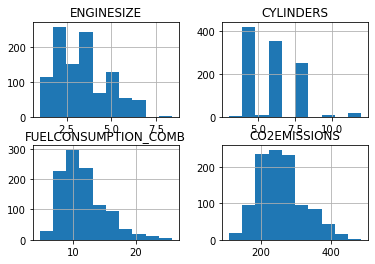

In [5]:
# histogram plot

some_df.hist()
plt.show()

## ploting each features individually against CO2 Emission to show their relation

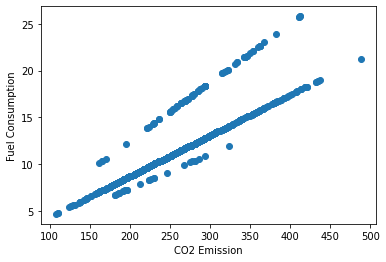

In [6]:
# plot of CO2 Emission vs Fuel consumption

emission = some_df.CO2EMISSIONS
consumption = some_df.FUELCONSUMPTION_COMB

plt.scatter(emission, consumption)
plt.xlabel("CO2 Emission")
plt.ylabel("Fuel Consumption")
plt.show()

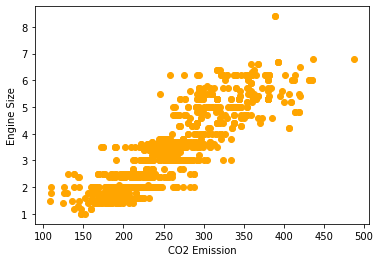

In [31]:
# plot of CO2 Emission vs Engine Size

plt.scatter(emission, some_df.ENGINESIZE, color='orange')
plt.xlabel("CO2 Emission")
plt.ylabel("Engine Size")
plt.show()

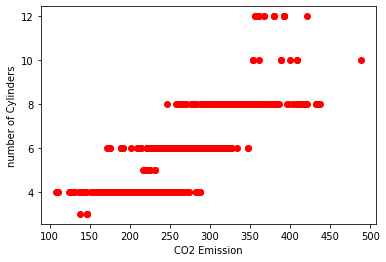

In [7]:
# plot of CO2 Emission vs number of Cylinders

plt.scatter(emission, some_df.CYLINDERS, color='red')
plt.xlabel("CO2 Emission")
plt.ylabel("number of Cylinders")
plt.show()

## Spliting dataset into training and test set
### 80% of the entire data for training, and the 20% for testing

In [11]:
msk = np.random.rand(len(df))<0.8
train = some_df[msk]
test = some_df[~msk]

print("length of dataset: ",len(df))
print("length of train data: ",len(train), ", which is 80% of whole dataset")
print("length of test data: ", len(test), ", which is 20% of whole dataset")

length of dataset:  1067
length of train data:  866 , which is 80% of whole dataset
length of test data:  201 , which is 20% of whole dataset


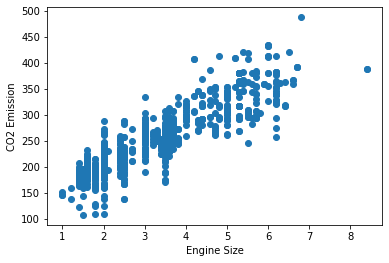

In [10]:
# train data visualiztion

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS)
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emission")
plt.show()

In [12]:
# Modeling using sklearn library

regression = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']]) # converting to an array
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regression.fit(train_x, train_y)

print("Coefficients: ", regression.coef_)
print("Intercept: ", regression.intercept_)

Coefficients:  [[39.36726457]]
Intercept:  [124.3275223]


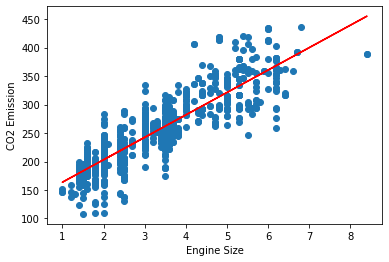

In [19]:
#plotting the output to trained data

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS)
plt.plot(train_x, regression.coef_[0][0]*train_x + regression.intercept_[0], '-r')  # y = mx+c
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emission')
plt.show()


## Evaluation
### compare the actual values and predicted values to calculate the accuracy of a regression model.

In [27]:
# Finding R-squared value(The higher the R-squared, the better the model fits your data)

from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
pridicted_test_y = regression.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(pridicted_test_y - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((pridicted_test_y - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , pridicted_test_y) )

NameError: name &#39;test_y_&#39; is not defined